of data https://dacon.io/competitions/official/235930/data

# 데이터 준비

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
!cp /gdrive/MyDrive/tmp/open.zip ./

In [3]:
!unzip open.zip

Archive:  open.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               
  inflating: val.csv                 


In [4]:
!ls -al

total 227872
drwxr-xr-x 1 root root     4096 Jul  1 04:24 .
drwxr-xr-x 1 root root     4096 Jul  1 04:24 ..
drwxr-xr-x 4 root root     4096 Jun 29 13:43 .config
-rw------- 1 root root 72429599 Jul  1 04:24 open.zip
drwxr-xr-x 1 root root     4096 Jun 29 13:44 sample_data
-rw-r--r-- 1 root root  1425039 Jun 30 10:28 sample_submission.csv
-rw-r--r-- 1 root root 79840026 Jun 30 10:28 test.csv
-rw-r--r-- 1 root root 63625405 Jun 30 10:28 train.csv
-rw-r--r-- 1 root root 15992449 Jun 30 10:28 val.csv


# 데이터 로딩

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
train_df = pd.read_csv("train.csv")

In [7]:
train_df.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,3,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972
1,4,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972
2,6,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,-0.994960
3,8,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.262698,-0.994901
4,9,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.994900,-0.994901


In [8]:
train_df = train_df.drop(columns="ID")


In [9]:
train_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972
1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972
2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,-0.994960
3,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.262698,-0.994901
4,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.994900,-0.994901


In [11]:
x = train_df.to_numpy()

In [12]:
print(x.shape)

(113842, 30)


In [14]:
from sklearn.model_selection import train_test_split

(train_x, test_x) = train_test_split(x, test_size=0.2, random_state=42)

# 모델 학습

In [16]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Input
from tensorflow.keras import Model
from tensorflow.keras import backend as K
from tensorflow.keras import Sequential

from tensorflow.keras.optimizers import Adam

import random
import pickle
import cv2
import matplotlib


In [49]:
# copy from https://gist.github.com/stared/dfb4dfaf6d9a8501cd1cc8b8cb806d2e

from IPython.display import clear_output
from tensorflow.keras.callbacks import Callback

class PlotLosses(Callback):

  def on_train_begin(self, logs={}):
    self.epochs = []
    self.losses = []
    self.val_losses = []
    self.logs = []
    self.fig = plt.figure()


  def on_epoch_end(self, epoch, logs={}):

    self.epochs.append(epoch)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))

    clear_output(wait=True)
    plt.plot(self.epochs, self.losses, label="loss")
    plt.plot(self.epochs, self.val_losses, label="val_loss")
    plt.legend()
    plt.show();
    print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])

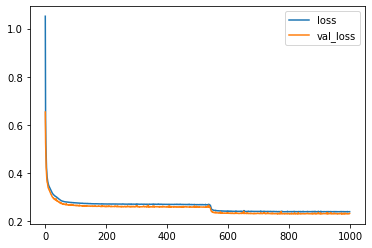

loss =  0.24043621122837067 , val_loss =  0.2335456758737564
321/321 [==============================] - 2s 5ms/step - loss: 0.2404 - val_loss: 0.2335


In [50]:
# 모형 구성
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=30))
model.add(Dense(8, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(30))
model.compile(optimizer='adam', loss='mse')


# 모형 학습
plot_losses = PlotLosses()
model.fit(train_x, train_x, epochs=1000, batch_size=256, validation_split=0.1, callbacks=[plot_losses])


# diff 상한 하한 구하기

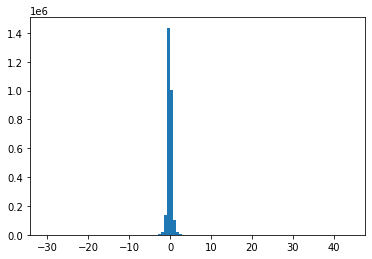

In [51]:
predicted = model.predict(train_x)
diff = predicted - train_x
plt.hist(diff.flatten(), bins=100)
plt.show()

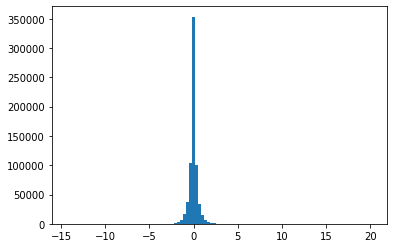

In [52]:
predicted = model.predict(test_x)
diff = predicted - test_x

plt.hist(diff.flatten(), bins=100)
plt.show()

In [53]:
low_limit = np.quantile(diff, 0.01)
high_limit = np.quantile(diff, 0.99)
print(low_limit)
print(high_limit)

-1.3819961695228826
1.5223616776994786


# test 데이터 읽기

In [54]:
submission_x_df = pd.read_csv("test.csv")

In [55]:
submission_x_df.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,AAAA0x1,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,-0.994983
1,AAAA0x2,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,-0.994983
2,AAAA0x5,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,-0.994960
3,AAAA0x7,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,-0.237686,-0.994937
4,AAAA0xc,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,...,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,-0.167819,-0.994866


In [56]:
submission_x_df = submission_x_df.drop(columns="ID")

In [57]:
submission_x = submission_x_df.to_numpy()

# 테스트 데이터 예측

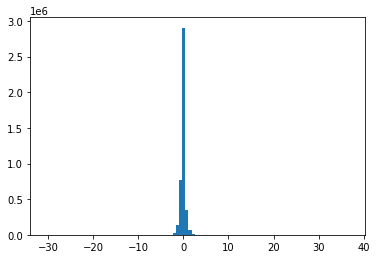

In [58]:
predicted = model.predict(submission_x)
diff = predicted - submission_x

plt.hist(diff.flatten(), bins=100)
plt.show()

In [59]:
large_diff_count = ((diff<low_limit)|(diff>high_limit)).sum(axis=1)
print(large_diff_count)

[0 0 1 ... 2 0 0]


In [60]:
anomaly = (large_diff_count>=1).astype(np.int8)
print(anomaly)

[0 0 1 ... 1 0 0]


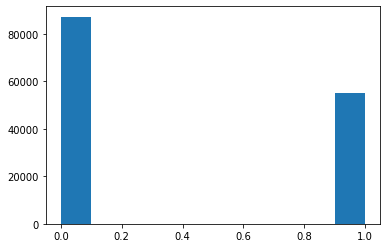

In [61]:
plt.hist(anomaly)
plt.show()

# Submission 파일 만들기

In [62]:
submission_df = pd.read_csv("sample_submission.csv")

In [63]:
submission_df.head()

,ID,Class
0,AAAA0x1,1
1,AAAA0x2,1
2,AAAA0x5,1
3,AAAA0x7,1
4,AAAA0xc,1


In [64]:
submission_df['Class'] = anomaly

In [65]:
submission_df.to_csv("submission.csv", index=False)

In [66]:
!head submission.csv

ID,Class
AAAA0x1,0
AAAA0x2,0
AAAA0x5,1
AAAA0x7,0
AAAA0xc,0
AAAA0xd,0
AAA0x11,0
AAA0x15,1
AAA0x17,1
